# Statistics you Should Show to Your Anti-Vaccine Friend
## By: Victorio H. S. Maculan

Got to do deal with an Anti-Vacciner and want to prove he's wrong? Here's your solution: A bunch of statistics of several epidemics/pandemics and their relation with vaccines. No more talking, let's get started.

Firstly, we need to get everything ready.

In [161]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [160]:
covid = pd.read_csv('../databases/covid19-cases-and-deaths.csv', parse_dates=['Date_reported'])
covid_vacs = pd.read_csv('../databases/covid19-vaccination-data.csv', index_col='COUNTRY')

I think it's fair to start with the most recent pandemic: [COVID-19's 2019 Pandemic](https://en.wikipedia.org/wiki/COVID-19_pandemic).

Let's start by analysing the cases and deaths in Europe (Because the vaccination started in there).

In [48]:
global_cases = covid.groupby(['WHO_region', 'Date_reported'])['New_cases'].sum()
global_deaths = covid.groupby(['WHO_region', 'Date_reported'])['New_deaths'].sum()

europe_cases = global_cases.loc['EURO']
europe_deaths = global_deaths.loc['EURO']

europe_cases.name = 'EURO Cases'
europe_deaths.name = 'EURO Deaths'

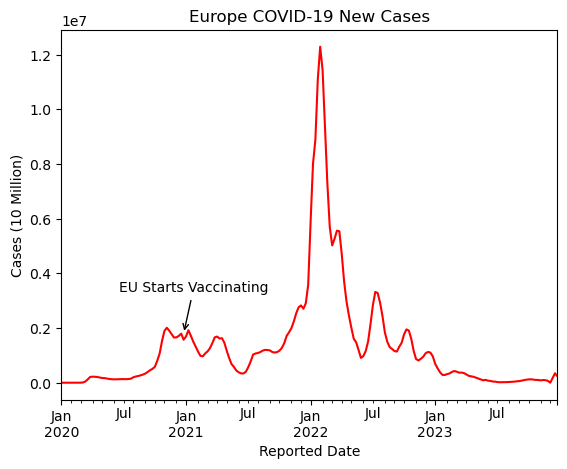

In [49]:
graph = europe_cases.plot(title='Europe COVID-19 New Cases', 
                          xlabel='Reported Date', ylabel='Cases (10 Million)',
                          color='red');
graph.annotate('EU Starts Vaccinating', 
               xy=('12-21-2020', europe_cases.loc['2020-12-20']), # Nearest register possible to 12-21-2020 (For y axis)
               xytext=('06-21-2020', europe_cases.loc['2020-12-06']*2), # Text position 
               arrowprops=dict(color='black', arrowstyle='->'));

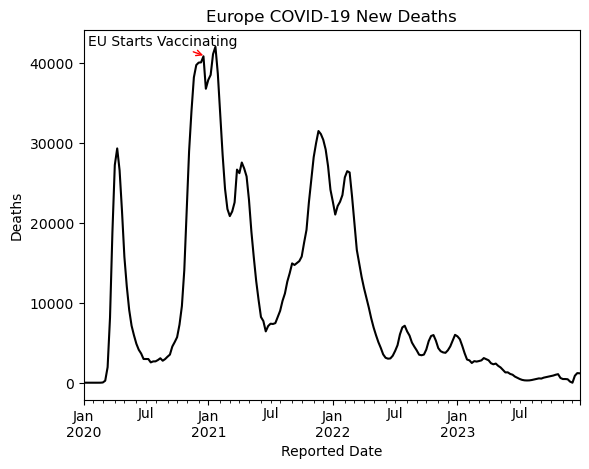

In [5]:
graph2 = europe_deaths.plot(title='Europe COVID-19 New Deaths', 
                  xlabel='Reported Date', ylabel='Deaths',
                 color='black')
graph2.annotate('EU Starts Vaccinating', 
               xy=('12-21-2020', europe_deaths.loc['2020-12-20']), # Nearest register possible to 12-21-2020 (For y axis)
               xytext=('01-15-2020', 42300), # Text position 
               arrowprops=dict(color='red', arrowstyle='->'));

The first country in the world to start vaccinating its citizens was The United Kingdom on 12-08-2020[\*](https://en.wikipedia.org/wiki/COVID-19_vaccination_in_the_United_Kingdom).

Several days later, on 12-21-2020 many other countries from the European Union (EU) also started vaccinating. That day is indicated as "EU Starts Vaccinating" on both graphs above.

In the first graph (Which features the "Europe COVID-19 New Cases") we can see that there is not any significant change in the number of cases after the start of the vaccination, in fact, **the vaccine doesn't protect from from getting infected, but lower the chances of death**.

In the second graph (Featuring "Europe COVID-19 New Deaths"), after the vaccination, we notice an immediate fall in the number of deaths, that, besides two small peaks, keep going down until July 2021. It gets even more impressive when we consider that **in the period of the peak of new cases (July 2022 to July 2023) the number of cases was approximately 3.3 times higher than in the same period of last year in which the vaccination had just started (July 2021 to July 2022). Still, the number of deaths was approximately 1.2 times lower.**

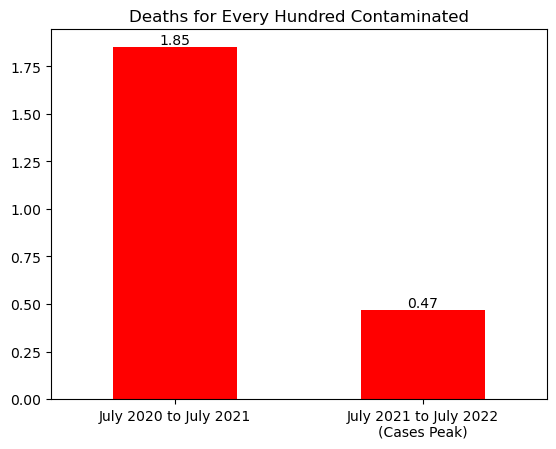

In [6]:
peak1 = pd.merge(europe_cases['2020-07':'2021-07'], europe_deaths['2020-07':'2021-07'],
                right_index=True, left_index=True).sum()
peak2 = pd.merge(europe_cases['2021-07':'2022-07'], europe_deaths['2021-07':'2022-07'],
                right_index=True, left_index=True).sum()

peaks_pct = pd.Series({'peak1': peak1['EURO Deaths'] * 100 / peak1['EURO Cases'], 
                       'peak2': peak2['EURO Deaths'] * 100 / peak2['EURO Cases']})

graph3 = peaks_pct.plot.bar(title='Deaths for Every Hundred Contaminated', color='red')
graph3.set_xticklabels(['July 2020 to July 2021', 'July 2021 to July 2022\n(Cases Peak)'], rotation=360)
plt.bar_label(graph3.containers[0], peaks_pct.round(2));

Now, we're going to take a look at the countries with the most deaths from COVID-19 and their vaccination rates, they are, respectively, United States of America, Brazil, India, Russia, and Mexico.

In [150]:
columns = ['PERSONS_VACCINATED_1PLUS_DOSE_PER100', 'PERSONS_LAST_DOSE_PER100', 
           'PERSONS_BOOSTER_ADD_DOSE_PER100']

global_vacs = covid_vacs[columns]
global_vacs.columns = ['1+ Doses', 'Last Dose', 'Additional Dose']

deaths_by_country = covid.groupby('Country')['New_deaths'].sum()
deaths_by_country.sort_values(ascending=False, inplace=True)

most_aff_deaths = deaths_by_country[0:5]
most_aff_vacs = global_vacs.loc[most_aff_deaths.index]

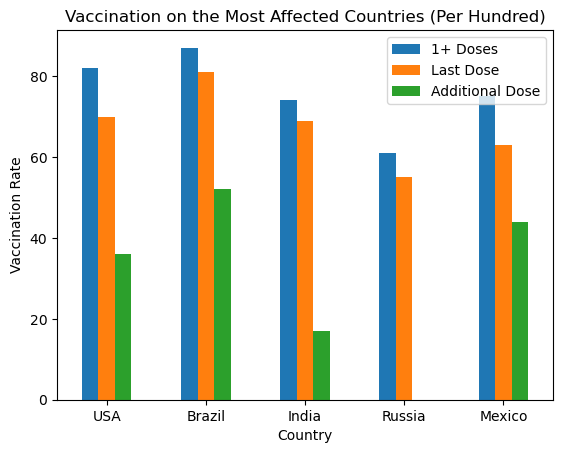

In [153]:
graph4 = most_aff_vacs.plot.bar(title='Vaccination on the Most Affected Countries (Per Hundred)', 
                                ylabel='Vaccination Rate')
graph4.set_xticklabels(['USA', 'Brazil', 'India', 'Russia', 'Mexico'], rotation=360);

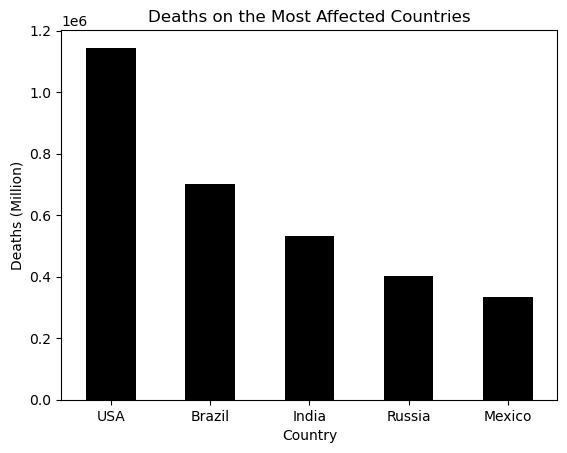

In [154]:
graph5 = most_aff_deaths.plot.bar(title='Deaths on the Most Affected Countries', color='black', 
                                  ylabel='Deaths (Million)')
graph5.set_xticklabels(['USA', 'Brazil', 'India', 'Russia', 'Mexico'], rotation=360);

The first graph shows the vaccination rates of the most affected countries. It's noticeable that the vaccination rate is not very impressive. **In fact, the most vaccinated country on the list, Brazil, is only in 31st place on the global vaccine rate ranking, followed by the USA (55th place), Mexico (89th place), India (98th place), and Russia (120th place).**

Another detail that should not be overlooked is that many countries in this list have a [strong anti-vaccine movement](https://en.wikipedia.org/wiki/COVID-19_vaccine_hesitancy_in_the_United_States) or [an important public figure's anti-vaccine speech](https://www.bbc.com/news/technology-52106321).

In the second graph, for comparison, are the number of deaths on each of the most affected countries.

In [158]:
data = covid_vacs.reset_index()[['COUNTRY', 'TOTAL_VACCINATIONS_PER100']]

data.sort_values('TOTAL_VACCINATIONS_PER100', ascending=False, inplace=True)
data.set_index('COUNTRY', inplace=True)
data['RANKING (GLOBAL)'] = np.arange(1, len(data)+1)

most_aff = data.loc[most_aff_vacs.index]
most_aff.sort_values('TOTAL_VACCINATIONS_PER100', ascending=False)

,TOTAL_VACCINATIONS_PER100,RANKING (GLOBAL)
Country,,
Brazil,243.0,31
United States of America,215.0,55
Mexico,173.0,89
India,160.0,98
Russian Federation,128.0,120
